## Dealing with Missing Data

### Identifying missing values in tabular data
    

In [1]:
from io import StringIO
import pandas as pd

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,
'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
# Count the number of missing value per feature
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
# Access the underlying NumPy array of a Dataframe using 
# the values attribute
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Eliminating training examples or features with missing values
- eliminating training examples

In [4]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


- eliminating features

In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# drop rows where all columns are null
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# drop rows with fewer than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# drop rows if NaN appear in a specific column (here: 'D')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [9]:
df.dropna(subset=['C','D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0


### Downside of removing features or examples
- removing too many sample making reliable analysis impossible
- removing too many feature column may result in loss of valuable info that our classifier needs to discriminate between classes

### Imputing missing vales
- interpolation technique to estimate the missing values from the other training examples in our dataset
- __mean imputation__: replace missing values with mean of the feature column



In [10]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values = np.nan, strategy='mean')
# Learn fitting parameters from training data
# giving df.values as input because sklearn is efficient on NumPy array
imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Handling categorical data
- __Ordinal__ and __nominal__ features
- Ordinal features: values that can be sorted, e.g. t-shirt size
- Nominal feauters: cannot be sorted, e.g. t-shirt color

### Encoding class labels

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a df
import pandas as pd
df = pd.DataFrame([
['green', 'M', 10.1, 'class2'],
['red', 'L', 13.5, 'class1'],
['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']

class_le = LabelEncoder()
y  = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [13]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [14]:
# Mapping size
size_le = LabelEncoder()

X = df[['color','size','price']].values
X[:,1]  = size_le.fit_transform(df['size'].values)
X

array([['green', 1, 10.1],
       ['red', 0, 13.5],
       ['blue', 2, 15.3]], dtype=object)

In [15]:
size_le.inverse_transform(y)

array(['M', 'L', 'M'], dtype=object)

## One hot encoding on nominal features

In [16]:
# Encoding color
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 0, 13.5],
       [0, 2, 15.3]], dtype=object)

In [17]:
color_le.inverse_transform(y)

array(['green', 'blue', 'green'], dtype=object)

- the learning algorithm will consider one color to be larger than \
other because they are encoded as numbers
- common workaround: __one-hot encoding__
- create a new dummy feature for each unique value in the nominal feature column


In [18]:
from sklearn.preprocessing import OneHotEncoder

color_ohe = OneHotEncoder()

color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## Partitioning a dataset into separate training and test datasets


In [19]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                     'ml/machine-learning-databases/'
                     'wine/wine.data', header=None)

In [20]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                  'Color intensity', 'Hue', 'OD290/OD315 of diluted wines',
                  'Proline']

In [21]:
print('Class labels:', np.unique(df_wine['Class label']))

Class labels: [1 2 3]


In [22]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD290/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
from sklearn.model_selection import train_test_split

# Slice feature matrix and target as NumPy arrays
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size =0.3,
                                                   random_state=0,
                                                   stratify=y)

- Larger the dataset, smaller the test_size
    - If 100,000 instances are present, only 10,000 examples in test set could be enough (test_size = 0.1)

### Bringing features onto the same scale
- decision tree and random forest: no need to worry about feature scaling because these algorithm are scale invariant
- most ML algorithms behave much better if the features are on the same scale
- In KNN algorithm with Euclidean distance measure: the computed distances between instances will be dominated by a feature that has a large scale
- Common approaches
    - __Normalization__
    
    $x^i_{norm} = \frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Compute min and max to be used later for scaling
fit = MinMaxScaler().fit(X_train)

# transform the training set using fitted parameters
X_train_norm = fit.transform(X_train)


__Exact same code just a little shorter by combining fit and transform__

In [25]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

X_train_std = mmsc.fit_transform(X_train)
X_test_std = mmsc.transform(X_test)

- __Standardization__

    $x^i_{std} = \frac{x^{(i)}-\mu_x}{\sigma_x}$


In [26]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Selecting meaningful features
- Does you model perform much better on training datasets than the test data set? 
    - You are probably __overfitting__ and your model has a high variance
- Reasons for overfitting: model too complex for the given training data
- Common solutions to reduce the generalization error (overfitting)
    - collect more training data
    - introduce a penalty function for complexity via regularization
    - choose simple model with fewer parameters
    - reduce dimensionality of the data

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', solver='liblinear',
                        C = 1.0, multi_class='ovr')
# C = 1.0 default. Incerasing/decreasing C will make regularization 
# strength weaker/stronger

lr.fit(X_train_std,y_train)
print("Training accuracy: ", lr.score(X_train_std, y_train))
print("Test accuracy: ", lr.score(X_test_std, y_test))

lr.intercept_

Training accuracy:  1.0
Test accuracy:  1.0


array([-1.26379557, -1.21600272, -2.36981883])

In [28]:
lr.coef_

array([[ 1.24570594,  0.18045897,  0.74594842, -1.16338568,  0.        ,
         0.        ,  1.16061779,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55619325,  2.50905941],
       [-1.53743837, -0.38705714, -0.99535314,  0.36471405, -0.0594111 ,
         0.        ,  0.66810793,  0.        ,  0.        , -1.93370758,
         1.23445352,  0.        , -2.23229079],
       [ 0.13491627,  0.16994814,  0.35777669,  0.        ,  0.        ,
         0.        , -2.43209147,  0.        ,  0.        ,  1.56264269,
        -0.81700813, -0.49775538,  0.        ]])

In [29]:
[10**x for x in range(-4, 5, 1)]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

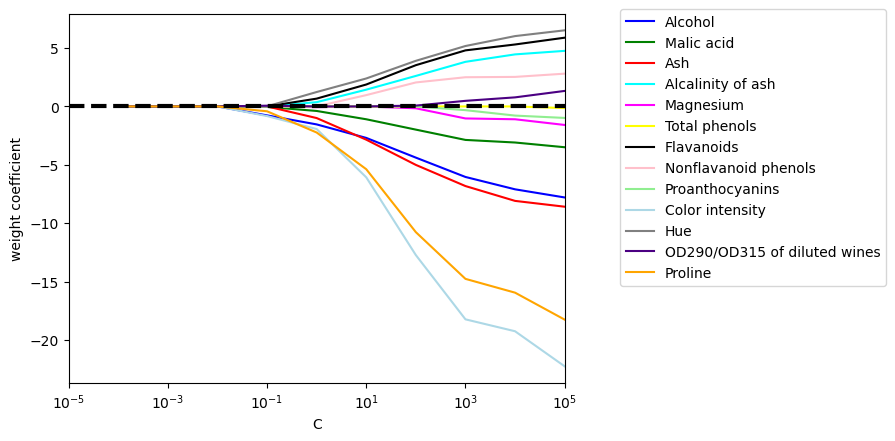

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [],[]
for c in [10**x for x in range(-4,6,1)]:
    lr = LogisticRegression(penalty='l1', solver='liblinear',
                        C = c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### L1 regularization behavior
- all feature weights will be zero if we penalize the model with a strong regularization (C< 0.01)
- Note: C is the inverse of the regularization parameter $\lambda$

## Sequential feature selection algorithms
- alternative way of avoiding overfitting: __dimensionality reduction__
- two main types:
    - __feature selection__: select subset of original features
    - __feature selection__: derive information from the feature set to construct a new feature subspace
    
- Sequential feature selection algorithms are used to reduce an initial d-dimensional feature space to a k-dimensional
feature subspace where k<d. 
- The motivation behind feature selection algorithms is to 
    - automatically select a subset of features that are most relevant to the problem
    - improve computational efficiency
    - to reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization.
- __Sequeential backward selection (SBS)__
    - aims to reduce dimensionality of the initial feature subspace with a minimal reduction in performance of the classifier to improve computational efficiency
    - sequentially removes features until the desired no. of features is reached
    - To determine what feature to remove at each stage, a criterion function, _J_, is defined that is to be minimized
    - _J_ can simply be the difference in the performance of the classifier before and after the removal of a particular feature
    - At each step, the feature is removed that maximizes _J_. IOW, the feature that causes least performance loss after removal is removed
    - Algorithm:
        - Initialize with _k=d_ , _d_:dim of full feature space $X_d$
        - Determine the feature, $x^-$, that maximizes the criterion:
        
        $x^- = argmax J(X_k-x)$ where $x \in X_k$
        - Remove $x^-$ from the feature set:$X_{k-1}-x^-; k = k-1$
        - Iterate until _k_ = desired no. of features
    - SBS not implemented in sklearn yet
    - Let us build SBS from scratch

In [31]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
class SBS():
    def __init__(self,estimator,k_features, scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(\
                            X, y, test_size=self.test_size,
                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test
                                , self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test,
                                        y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self,X):
        return X[:, self.indices_]
    
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score
    
    
    
    
    

In [33]:
#Implementing SBS using KNN from sklearn
# from sklearn.neighbors import KNeigbhorsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

In [34]:
print(sbs.subsets_)
print(sbs.scores_)


[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]
[0.967741935483871, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.967741935483871, 0.967741935483871, 0.967741935483871, 1.0, 0.9354838709677419, 0.7741935483870968]


In [35]:
# the list has to be reversed with [::-1] becauese the first trail
# starts with 12 features
k_feat = np.asarray(sbs.subsets_).ravel()[::-1]

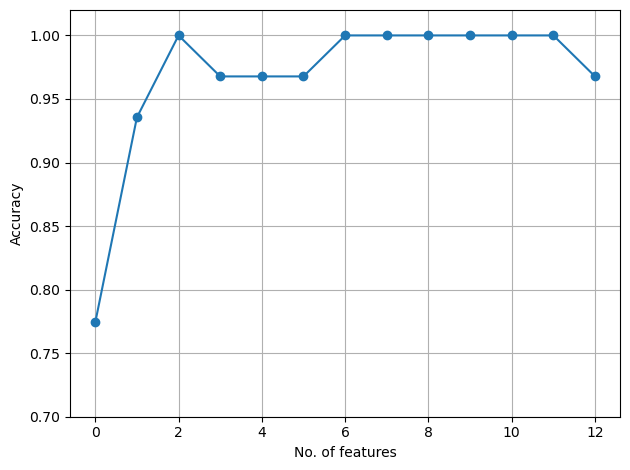

In [36]:

plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel("No. of features")
plt.grid()
plt.tight_layout()
plt.show()


## Assessing feature importance with RF

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD290/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


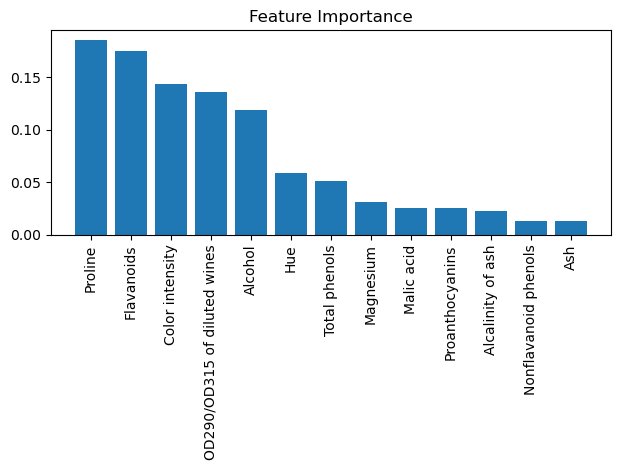

In [39]:
from sklearn.ensemble import RandomForestClassifier

f_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,f_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),f_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [42]:
# Select features based on user-specified threshold

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

X_selected = sfm.transform(X_train)
print("Number of features satisfying threshold: ", X_selected.shape[1])

for ct in range(X_selected.shape[1]):
    print("%2d) %-*s %f "%(ct+1, 30, f_labels[indices[ct]],
                          importances[indices[ct]]))

Number of features satisfying threshold:  5
 1) Proline                        0.185453 
 2) Flavanoids                     0.174751 
 3) Color intensity                0.143920 
 4) OD290/OD315 of diluted wines   0.136162 
 5) Alcohol                        0.118529 
